In [1]:
import torch
import numpy as np
from models.generator import DepthNet
from models.generator import PoseNet
from torchvision import transforms
from PIL import Image
from models.discriminator import Discriminator
# from torchsummary import summary
import matplotlib.pyplot as plt
# import open3d as o3d
import sys
from models.wrap import inverse_warp
from models.GAN import DPGAN
from models.cor_loss import CORLoss,PhotometricLoss

torch.Size([1, 3, 352, 1216])
torch.Size([1, 352, 1216])


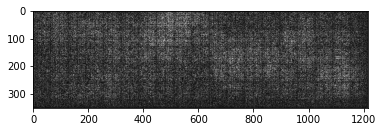

In [2]:
img = Image.open("images/1.png")
transform = transforms.ToTensor()
img = transform(img)
img = img[None, :, :, :]
print(img.shape)

model = DepthNet()
depth = model(img)
depth = torch.squeeze(depth, dim=0)
print(depth.shape)

plt.imshow(np.transpose(depth.detach().numpy(), (1,2,0)), cmap="gray");

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


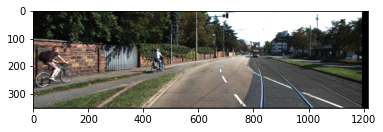

In [19]:
img = Image.open("images/0.png")
transform = transforms.ToTensor()
img = transform(img)
img = img[None, :, :, :]


# depth = torch.rand(1,352,1216)/100000000000


im_frame = Image.open('true_depth.png').convert('L')
np_frame = (np.array(im_frame).astype(np.double))
depth = torch.from_numpy(np_frame)
depth = depth[None,:,:].float()
print(depth)

pose_left = torch.tensor([[ 0, 0, 0, 3.14, 0, 0]])
intrinsics = torch.tensor([[721.5377, 0, 596.5593],
                                           [0, 721.5377, 149.854],
                                           [0, 0, 1]])
rep,val,grid = inverse_warp(img, depth, pose_left,intrinsics,rotation_mode='euler', padding_mode='zeros')
rep_0= torch.squeeze(rep[0], dim=0)
plt.imshow(np.transpose(rep_0.detach().numpy(), (1,2,0)));

In [20]:
cor_loss = PhotometricLoss()
cor_loss(img,rep)

tensor(0.9154)

(array([330723.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  97309.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

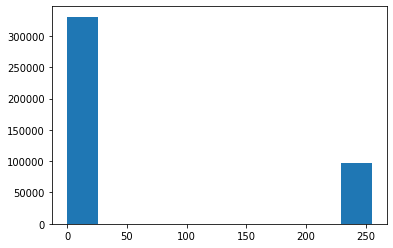

In [21]:
plt.hist(np.ravel(np_frame))

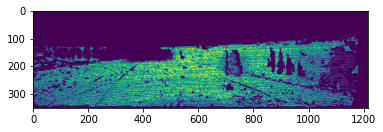

In [22]:
plt.imshow(np_frame)

In [23]:
dpgan = DPGAN()
# dpgan.to('cuda')
# dpgan.train(None,5,10)

/Users/dingkeyi/Desktop/JHU/Spring2023/Deep_Learning/dl_final_project/models/generator.py:88: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.linear1.weight)
/Users/dingkeyi/Desktop/JHU/Spring2023/Deep_Learning/dl_final_project/models/generator.py:90: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.linear2.weight)
/Users/dingkeyi/Desktop/JHU/Spring2023/Deep_Learning/dl_final_project/models/generator.py:92: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.linear3.weight)
/Users/dingkeyi/Desktop/JHU/Spring2023/Deep_Learning/dl_final_project/models/generator.py:94: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.linear4.weight)


In [ ]:
dpgan.train_model(None,30,500)

Training epoch 0 of 500


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/torch/autograd/__init__.py:173: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/IndexingUtils.h:28.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Generator loss: 5043.4091796875, Discriminator loss: 2.0848875045776367
---------------------------------------------------------
Training epoch 1 of 500
